In [1]:
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
import string
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from keras.models import Sequential,load_model
from keras.layers import Dense, advanced_activations, Dropout, LSTM, GRU, Embedding, SimpleRNN, Conv2D, Flatten
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
!pip install tqdm
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import glob
import cv2
import gc
!pip install mne
import mne
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time
import pickle

def save_model_json(model, filename):
  # serialize model to JSON
  model_json = model.to_json()
  with open(f"{filename}.json", "w") as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights(f"{filename}.h5")
  print(f"Saved {filename} to disk")
  


def load_model_json(filename):
  # load json and create model
  json_file = open(f'{filename}.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(f"{filename}.h5")
  print(f"Loaded {filename} from disk")
  return loaded_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# FEIS

In [2]:
dir_path = '/content/drive/MyDrive/Bath/Dissertation/Preliminary analysis/FEIS-master/data_eeg/18/'
with ZipFile(dir_path + 'full_eeg.zip', 'r') as zip:
  print(zip)
  print(zip.printdir())
  zip.extractall()

data_set = pd.read_csv('full_eeg.csv')

with ZipFile(dir_path + 'thinking.zip', 'r') as zip:
  print(zip)
  print(zip.printdir())
  zip.extractall()

data_set_thinking = pd.read_csv('thinking.csv')

<zipfile.ZipFile filename='/content/drive/MyDrive/Bath/Dissertation/Preliminary analysis/FEIS-master/data_eeg/18/full_eeg.zip' mode='r'>
File Name                                             Modified             Size
full_eeg.csv                                   2019-08-08 11:51:00    211441279
None
<zipfile.ZipFile filename='/content/drive/MyDrive/Bath/Dissertation/Preliminary analysis/FEIS-master/data_eeg/18/thinking.zip' mode='r'>
File Name                                             Modified             Size
thinking.csv                                   2019-08-08 11:48:48     50404536
None


In [3]:
data_set_thinking

,Time:256Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,P8,T8,F8,AF4,FC6,F4,Label,Stage,Flag
0,11.000000,0,4234.487305,4265.384766,4239.358887,4207.820312,4253.461426,4249.487305,4250.128418,4245.512695,4256.538574,4248.333496,4245.897461,4241.922852,4247.307617,4209.487305,goose,thinking,NaN
1,11.003906,0,4235.512695,4263.461426,4241.282227,4205.128418,4253.077148,4249.615234,4250.000000,4246.282227,4258.461426,4252.692383,4248.077148,4243.717773,4252.436035,4212.051270,goose,thinking,NaN
2,11.007812,0,4239.102539,4266.025879,4247.307617,4208.205078,4256.538574,4253.077148,4251.794922,4247.307617,4261.410156,4255.897461,4253.717773,4248.717773,4259.615234,4215.384766,goose,thinking,NaN
3,11.011719,0,4244.102539,4271.410156,4254.230957,4215.384766,4262.051270,4258.717773,4255.384766,4247.820312,4263.717773,4257.692383,4260.128418,4254.743652,4264.615234,4218.589844,goose,thinking,NaN
4,11.015625,0,4249.358887,4276.282227,4258.846191,4223.333496,4266.922852,4263.077148,4259.743652,4248.077148,4264.743652,4258.974121,4264.615234,4259.358887,4266.025879,4221.538574,goose,thinking,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204795,3513.980469,159,4248.589844,4010.897461,4228.077148,4231.025879,4232.820312,4246.666504,4231.282227,4235.128418,4237.051270,4222.948730,4222.563965,4227.051270,4206.282227,4230.897461,s,thinking,NaN
204796,3513.984375,159,4247.307617,4012.307617,4230.256348,4232.948730,4229.743652,4246.410156,4231.666504,4237.307617,4239.102539,4221.153809,4221.025879,4229.230957,4204.743652,4233.333496,s,thinking,NaN
204797,3513.988281,159,4247.179688,4013.589844,4232.692383,4235.641113,4226.922852,4246.025879,4233.461426,4240.769043,4241.538574,4221.538574,4222.563965,4232.307617,4205.384766,4235.512695,s,thinking,NaN
204798,3513.992188,159,4247.692383,4015.256348,4234.358887,4237.948730,4225.897461,4246.794922,4235.641113,4243.589844,4242.948730,4222.948730,4225.128418,4233.846191,4206.922852,4236.282227,s,thinking,NaN


In [4]:
print(data_set['Label'].unique())

['goose' 'thought' 'zh' 'p' 'sh' 'n' 'k' 'fleece' 'trap' 's' 'ng' 't' 'f'
 'z' 'm' 'v']


In [5]:
# Raw features and labels for one epoch
print(data_set_thinking.columns)
epoch0flat = data_set_thinking[data_set_thinking['Epoch'] == 0].drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Flag', 'Label']).to_numpy().flatten()
print(epoch0flat.shape)
data_set_thinking_flat = data_set_thinking.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Flag', 'Label']).to_numpy().reshape(160, 17920)
(epoch0flat == data_set_thinking_flat[0]).all()
my_pca = PCA(0.999)
thinking_pca = my_pca.fit_transform(data_set_thinking_flat)
thinking_pca.shape

def Handle(dataframe, pca_class = None):
  features = dataframe.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Flag', 'Label']).to_numpy().reshape(160, 17920)
  targets = dataframe['Label'].to_numpy().reshape(160, 1280)[:, 0]
  # Whatever else we want to do
  if pca_class != None:
    features = my_pca.transform(features)
  return train_test_split(features, targets, test_size = 0.2)

X_train, X_test, y_train, y_test = Handle(data_set_thinking)

Index(['Time:256Hz', 'Epoch', 'F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2',
       'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4', 'Label', 'Stage', 'Flag'],
      dtype='object')
(17920,)


In [6]:
X_train.shape

(128, 17920)

In [7]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train[:, None])
y_train_IE = np.argmax(y_train, axis = 1)
y_test = np.argmax(onehot_encoder.transform(y_test[:, None]), axis = 1)
#X_train = X_train.reshape(X_train.shape[0], 299 *299 * 3)
#X_test = X_test.reshape(X_test.shape[0], 299 *299 * 3)
print(X_train.shape, X_test.shape, y_train.shape, y_train_IE.shape, y_test.shape)


(128, 17920) (32, 17920) (128, 16) (128,) (32,)


In [8]:
pca = PCA(0.999)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
print(X_train.shape, X_test.shape, X_train_PCA.shape, X_test_PCA.shape)

(128, 17920) (32, 17920) (128, 118) (32, 118)


In [9]:
# ANN
# Simple DNN trained as a baseline for this problem...

In [10]:
%%time
# Train a model to classify speech...
nEpoch_DNN = 500
nBatchSize_DNN=4

DNN_simple = Sequential()
DNN_simple.add(Dense(50, input_dim= X_train_PCA.shape[1]))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(16, input_dim = 100, activation='sigmoid'))
DNN_simple.compile(loss='categorical_crossentropy', optimizer='Adam',  metrics=['accuracy'])
DNN_simple.summary()
print(X_train.shape, y_train.shape)
simple_DNN_training = DNN_simple.fit(X_train_PCA, y_train, epochs=nEpoch_DNN, batch_size=nBatchSize_DNN)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5950      
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 16)                1616      
                                                                 
Total params: 32,866
Trainable params: 32,866
Non-trainable params: 0
_________________________________________________________________
(128, 17920) (128, 16)
Epoch 1/500
32/32 [==========

In [11]:
#Generate predictions for the simple DNN
DNN_simple_pred = np.argmax(DNN_simple.predict(X_test_PCA), axis = 1)
DNN_simple_pred
print(DNN_simple_pred[:, None].shape, y_test.shape)

#Calculate prediction accuracy...
accuracy_score(y_test, DNN_simple_pred[:, None])

(32, 1) (32,)


0.03125

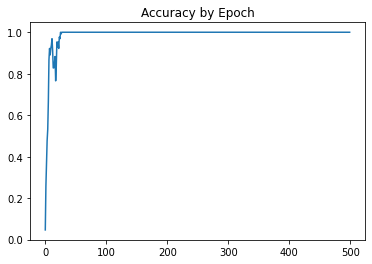

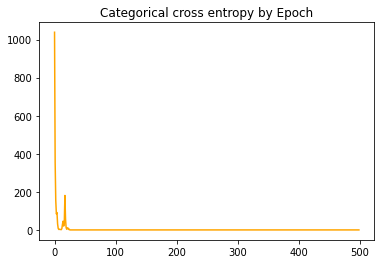

In [12]:
plt.plot(simple_DNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_DNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

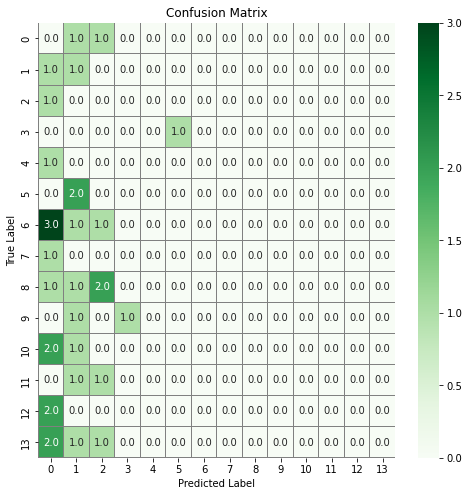

In [13]:
confusion_mtx = confusion_matrix(y_test, DNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# # format data for input to the CNN...
X_train_CNN = X_train.reshape(X_train.shape[0], 1280, 14, 1)
X_test_CNN = X_test.reshape(X_test.shape[0],1280, 14, 1)
# #test_submit_set = np.array(test_submit_set).reshape(test_submit_set.shape[0], 28, 28, 1)

In [15]:
%%time
nEpoch_CNN = 50
nBatchSize_CNN = 4

CNN_simple = Sequential()
#add model layers
CNN_simple.add(Conv2D(10, kernel_size=3, activation = 'relu', input_shape=(1280, 14, 1)))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Flatten())
CNN_simple.add(Dropout(0.2))
CNN_simple.add(Dense(16, activation= 'softmax'))
CNN_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
CNN_simple.summary()
simple_CNN_training = CNN_simple.fit(X_train_CNN, y_train, epochs=nEpoch_CNN, batch_size=nBatchSize_CNN)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1278, 12, 10)      100       
                                                                 
 conv2d_1 (Conv2D)           (None, 1276, 10, 20)      1820      
                                                                 
 conv2d_2 (Conv2D)           (None, 1274, 8, 20)       3620      
                                                                 
 conv2d_3 (Conv2D)           (None, 1272, 6, 20)       3620      
                                                                 
 flatten (Flatten)           (None, 152640)            0         
                                                                 
 dropout (Dropout)           (None, 152640)            0         
                                                                 
 dense_5 (Dense)             (None, 16)               

In [16]:
CNN_simple_pred = np.argmax(CNN_simple.predict(X_test_CNN), axis = 1)
CNN_simple_pred
accuracy_score(y_test, CNN_simple_pred[:, None])

0.0

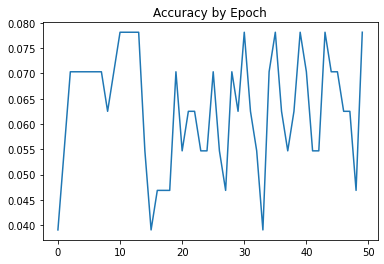

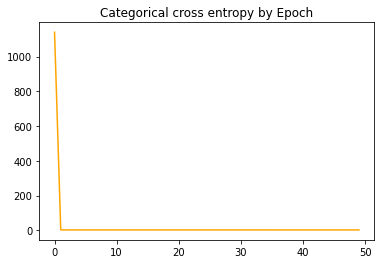

In [17]:
plt.plot(simple_CNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_CNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

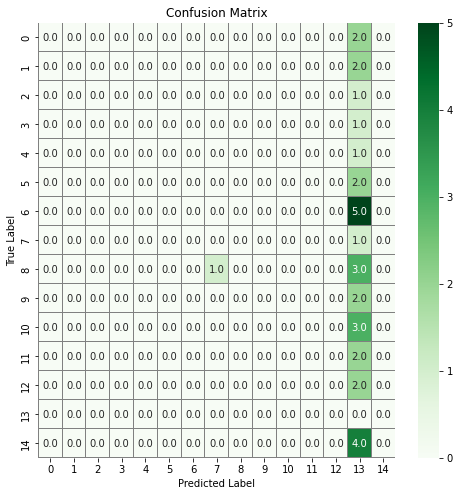

In [18]:
confusion_mtx = confusion_matrix(y_test, CNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

0.9375
0.03125


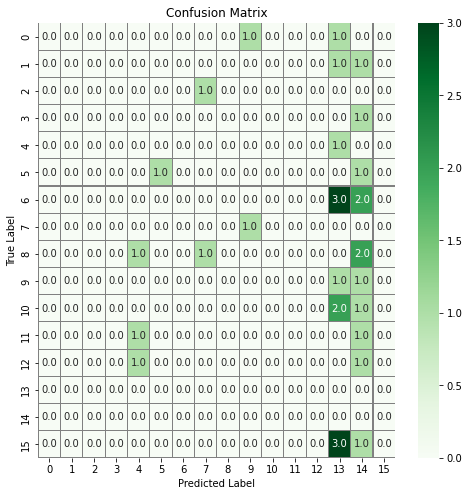

In [19]:
RF_train = True

test_perf_RF = True
#simInData_train.shape,simInData_test.shape, simOutData_train.shape, simOutData_test.shape

if RF_train:
    RF_init= RandomForestClassifier(max_depth = 100, min_samples_leaf=10)
    RF_init.fit(X_train_PCA, y_train_IE)
    pickle.dump(RF_train, open(str('RF_init'), 'wb'))
else:
    RF_init = pickle.load(open(str('RF_init'), 'rb'))

if test_perf_RF:
  RF_init_pred_train = (RF_init.predict(X_train_PCA))

  RF_init_pred_test = (RF_init.predict(X_test_PCA))

  #print(type(RF_toy_pred_test),simOutData_test.flatten())
  print(accuracy_score(RF_init_pred_train, y_train_IE))
  print(accuracy_score(RF_init_pred_test, y_test))
  confusion_mtx = confusion_matrix(y_test, RF_init_pred_test) 
  # plot the confusion matrix
  f,ax = plt.subplots(figsize=(8, 8))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

In [20]:

# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
RF_grid = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf}
print(RF_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [21]:
# RF_single = RandomForestRegressor()

# RF_single_random_search = RandomizedSearchCV(estimator = RF_single, param_distributions = RF_grid, n_iter = 50, cv = 5, verbose=2, n_jobs = -1)

# tune_start = time.clock()

# RF_single_random_search.fit(simInData_train, simOutData_train)

# tune_finish = time.clock()

# print('Total training time is ' + str(tune_finish  - tune_start) + ' seconds', RF_single_random_search.best_params_)
# RF_single_hps = RF_single_random_search.best_params_

RF_single = RandomForestClassifier()

RF_single_random_search = RandomizedSearchCV(estimator = RF_single, param_distributions = RF_grid, n_iter = 50, cv = 5, verbose=2, n_jobs = -1)

tune_start = time.clock()

RF_single_random_search.fit(X_train_PCA, y_train_IE)

tune_finish = time.clock()

print('Total training time is ' + str(tune_finish  - tune_start) + ' seconds', RF_single_random_search.best_params_)
RF_single_hps = RF_single_random_search.best_params_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Total training time is 3.92163699999999 seconds {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 110}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [22]:
RF_single_hps

{'max_depth': 110,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1200}

In [23]:
RF_single = RandomForestRegressor(n_estimators = RF_single_random_search.best_params_['n_estimators'],
                                  max_depth = RF_single_hps['max_depth'],
                                  min_samples_split = RF_single_hps['min_samples_split'],
                                  min_samples_leaf = RF_single_hps['min_samples_leaf'])
t0 = time.clock()
RF_single.fit(X_train_PCA, y_train_IE)
t1 = time.clock()
print('Total training time is ' + str(t1 - t0) + ' seconds' + ', or ' + str(
    float((t1 - t0) / 3600)) + f' hours, {X_train_PCA.shape[0]} training samples, {X_test_PCA.shape[0]} test samples')    
pickle.dump(RF_single, open(str('RF_toy_single'), 'wb'))

RF_single_pred_train = (RF_init.predict(X_train_PCA))

RF_single_pred_test = (RF_init.predict(X_test_PCA))

#print(type(RF_toy_pred_test),simOutData_test.flatten())
print(accuracy_score(RF_single_pred_train, y_train_IE))
print(accuracy_score(RF_single_pred_test, y_test))
confusion_mtx = confusion_matrix(y_test, RF_init_pred_test) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

NameError: ignored

# MNE work

In [ ]:
data_set[(data_set['Stage'] == 'thinking')].drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Flag'])

In [ ]:
sfreq = 256
ch_names = list(data_set.columns)[2:-3]
info = mne.create_info(ch_names = ch_names, sfreq = sfreq)
raw = mne.io.RawArray(data_set_thinking[ch_names].transpose(), info)
raw.plot()

In [ ]:
print(raw)
raw.info

In [ ]:
#raw.plot_psd(fmax=128)
raw.plot(duration=30, n_channels=14)

In [ ]:
ssp_projectors = raw.info['projs']
print(ssp_projectors)
raw.del_proj()

# KARA One